In [1]:
from os import path, mkdir

import sys
import artm
print artm.version()

%matplotlib inline

0.8.1


In [2]:
sys.path.insert(0, '..\\modules\\helpers')


In [17]:
from plot_helper import PlotMaker
plot_maker = PlotMaker()

In [4]:
from config_helper import ConfigPaths

In [20]:
from print_helper import PrintHelper
printer = PrintHelper()

In [5]:
config = ConfigPaths('config.cfg')

In [7]:
print config.models_file_name

Q:\\topic_modeling\\csi_science_collections.git\experiments\UCI_trimmed\ex_16_10\models.txt


In [6]:
models_file = open(config.models_file_name, 'a')


In [7]:
def create_model(current_dictionary, n_topics, n_doc_passes, seed_value, n_top_tokens, p_mass_threshold):
    model = artm.ARTM(num_topics=n_topics, dictionary=current_dictionary, cache_theta=True, seed=seed_value, 
                  class_ids={'ngramm': 1.0, 'author_id': 0.0, 'author': 0.0, 
                             'post_tag': 0.0, 'projects': 0.0, 'category': 0.0,
                             'following_users': 0.0})
    model.num_document_passes = n_doc_passes
    add_scores_to_model(model, n_top_tokens=n_top_tokens, p_mass_threshold=p_mass_threshold)
    return model


def add_scores_to_model(artm_model, n_top_tokens, p_mass_threshold):
    artm_model.scores.add(artm.PerplexityScore(name='perplexity_score',
                                      use_unigram_document_model=False,
                                      dictionary=dictionary))
    artm_model.scores.add(artm.SparsityPhiScore(name='sparsity_phi_score', class_id='ngramm'))
    artm_model.scores.add(artm.SparsityThetaScore(name='sparsity_theta_score'))
    artm_model.scores.add(artm.TopicKernelScore(name='topic_kernel_score', class_id='ngramm', 
                                                probability_mass_threshold=p_mass_threshold))
    artm_model.scores.add(artm.TopTokensScore(name='top_tokens_score', class_id='ngramm', num_tokens=n_top_tokens))

In [18]:
def process_one_model(dictionary, _n_topics, _n_doc_passes, _seed_value, _n_top_tokens, _p_mass_threshold, _n_iterations,
                     _model_name=''):
    print 'creating model'
    model = create_model(current_dictionary=dictionary, n_topics=_n_topics, n_doc_passes=_n_doc_passes, seed_value=_seed_value,
                         n_top_tokens=_n_top_tokens, p_mass_threshold=_p_mass_threshold)
    print 'fitting'
    model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=_n_iterations)
    print 'outputting'
    printer.print_artm_model(model, _model_name, output_file=models_file, n_iterations=_n_iterations, n_top_tokens=_n_top_tokens, p_threshold=_p_mass_threshold)
    model_pics_file_name =  path.join(config.experiment_path, _model_name)
    plot_maker.make_tm_plots(model, model_pics_file_name)
    model_output_file_name = path.join(config.experiment_path, _model_name + '.txt')
    printer.print_scores(model, model_output_file_name)
    printer.print_top_tokens(model, model_output_file_name)

In [10]:
batch_vectorizer = artm.BatchVectorizer(data_path=config.dataset_path,
                                        data_format='bow_uci',
                                        collection_name=config.collection_name,
                                        target_folder=config.output_batches_path)
dictionary = artm.Dictionary()
dictionary.gather(data_path=config.output_batches_path,
                  vocab_file_path=config.vocabulary_path)
dictionary.save(dictionary_path=config.dictionary_path)
dictionary.save_text(dictionary_path=config.dictionary_path + '.txt')
dictionary.load_text(dictionary_path=config.dictionary_path + '.txt')

In [ ]:
# batch_vectorizer = artm.BatchVectorizer(data_path=batches_path,
#                                         data_format='batches')
# dictionary = artm.Dictionary()
# dictionary.load(dictionary_path=dictionary_path + '.dict')

In [ ]:
# dictionary.filter(min_tf=5, max_tf=2000, min_df_rate=0.01, max_df_rate=0.9)

creating model
fitting
outputting
name = model1, n_topics = True, n_doc_passes = 5, seed_value = 100, n_iterations = 20, n_top_tokens = 10, p_threshold = 0.25


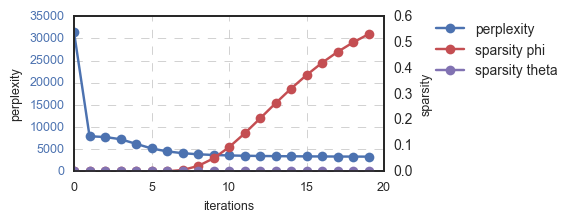

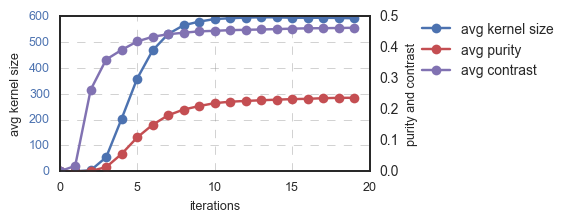

In [21]:
process_one_model(dictionary, _n_topics=50, _n_doc_passes=5, _seed_value=100, _n_top_tokens=10, _p_mass_threshold=0.25,
                  _n_iterations=20, _model_name='model1')

In [ ]:
models_file.close()